# TP2 : Codage et filtrage

**La feuille de calcul jupyter sera à envoyer à la fin de TP à l'adresse chupin@ceremade.dauphine.fr, avec dans le nom de la feuille de TP, les nom et prénom. Ce TP est prévu pour 3h de travail, même s'il est sans doute trop long.**

**Expliquez en détails ce que vous avez fait et essayer de commenter votre code. Essayez aussi, dans la feuille de compte rendu, de ne laisser que le minimum.**

On chargera les librairies classiques suivantes :


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.integrate
import random


## Codage source 

Dans cette partie du TP, on s'intéressera au codage source avec notamment l'algorithme de Huffman. 

On considère la chaine de caractère suivante que l'on cherchera à coder en binaire :

In [2]:
phrase = "le traitement du signal est une discipline large qui est à la croisée de plein de domaines des mathématiques"

### Dictionnaire et fréquence

#### Dictionnaire en python

En python, un dictionnaire est défini (initialisé) par:


In [3]:
mondict = {}

Par exemple :

In [4]:
a = {}
a["nom"] = "engel"
a["prenom"] = "olivier"
a["age"] = 23
print(a)
print(a["age"])

{'nom': 'engel', 'prenom': 'olivier', 'age': 23}
23


####  Calcul des fréquences d'apparition

En se définissant un dictionnaire (au sens de n-uplet ou d'une liste pour python) pour la langue française (on codera toutes les lettres minuscules ainsi que les espaces), définissez une fonction qui calcule la fréquence d'apparition. Elle retournera un dictionnaire (lettre/fréquence) python et pourra avoir la forme :
```python
def frequences(maphrase,ledictionnaire):
```
On pourra utiliser la fonction `count` pour compter dans la chaîne de caractère.

### Fabrication de l'arbre de codage de Huffman

On se propose ici d'ulitiser la librairie `heapq` de python (mais vous pouvez faire tout autrement !!). Celle-ci permet d'organiser une liste sous forme d’arbre binaire. Cette librairie nous permettra facilement de repérer les plus petits éléments.

On la chargera par :

In [5]:
import heapq 

L'exemple suivant permet de comprendre que le _push_ et le _pop_ permettent respectivement d'ajouter au bon endroit l'élément, et de récupérer le plus petit élément avec le _pop_.

In [7]:
l = []
heapq.heappush(l, 69)
heapq.heappush(l, 42)
heapq.heappush(l, 2048)
heapq.heappush(l, -273.15)
print(l) # la liste est ordonnée en arbre binaire...
for x in np.arange(len(l)): # et on depop pour itérer dans l'odre
    print(heapq.heappop(l))
    print(l)

[-273.15, 42, 2048, 69]
-273.15
[42, 69, 2048]
42
[69, 2048]
69
[2048]
2048
[]


Évidemment, les éléments dans l'arbre binaire peuvent ne pas être uniquement des réels, mais par exemple, un nuplet de liste. 

Pour fabriquer un arbre à partir d'une liste on fera :

In [8]:
a = [(45,"albert"),(26,"olivier"),(30,"sophie")]
heapq.heapify(a)
print(a)
print(heapq.heappop(a))
print(a)
print(heapq.heappop(a))
print(a)

[(26, 'olivier'), (45, 'albert'), (30, 'sophie')]
(26, 'olivier')
[(30, 'sophie'), (45, 'albert')]
(30, 'sophie')
[(45, 'albert')]


Sur cette exemple, par rapport à quelle valeur des n-uplet, l'arbre est-il construit ?

#### Quelques petites astuces qui pourront être utiles

In [9]:
print(['a']+['b'])

['a', 'b']


In [10]:
import collections

s = [('yellow', "1"), ('blue', "2"), ('yellow', "3"), ('blue', "4"), ('red', "1")]
d = collections.defaultdict(list)
for k, v in s:
    d[k].append(v)

print(d.items())

for k,v in d.items():
    d[k] = ''.join(d[k])
print(d.items())

dict_items([('yellow', ['1', '3']), ('blue', ['2', '4']), ('red', ['1'])])
dict_items([('yellow', '13'), ('blue', '24'), ('red', '1')])


Codez maintenant une fonction `huffman` qui prend en argument le dictionnaire de fréquence et qui retourne le code de Huffman de chaque élément du dictionnaire en base 2 sous forme d'un dictionnaire.

On pourra, en utilisant des librairies graphiques, tracer cet arbre de codage.


### Encodage et decodage de la phrase

1. Maintenant que nous avons notre arbre de codage, on peut encoder la phrase. Définissez une fonction d'encodage qui à une chaîne de caractères et un arbre de codage, retourne une chaîne de caractère composée de 0 et de 1.
2. Définissez une fonction de décodage.

# Fenêtrage et convolution

On chargera les données fournies sous forme de fichiers `np.array` à partir d’un fichier `wav` grâce à la bibliothèque `wavefile` de `scipy.io`.

**Important :** on prendra un entier $M=8000$ pour les transformée de Fourier et leur inverse pour les fonctions `np.fft`. 

On chargera les élements suivants :

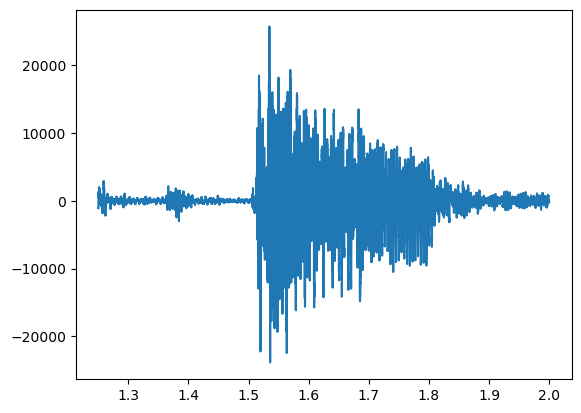

In [11]:
from scipy.io import wavfile
fsWav, data = wavfile.read('musique.wav')

t = np.array(range(len(data)))/fsWav

# extraire 6 secondes
time = [temps for temps in t if 1.25<=temps <=2]

data = [data[i] for i in range(0,len(data)) if 1.25<= t[i] <=2]
#data = dataTwo/np.max(dataTwo)
plt.figure()
plt.plot(time, data)
np.save("data",data)

On pourra écouter l’extrait dans la feuille Jupyter grâce au petit code suivant. 

In [12]:
from IPython.display import Audio
wave_audio = data
Audio(wave_audio, rate=fsWav)

## Réponse impulsionnelle au créneau

Cette partie est indépendante du chargement du signal précédent. Il s'agit ici de fabriquer un filtre, à partir de la représentation dans le domaine de Fourier de sa réponse impulsionnelle. À partir de cela, on fabriquera la réponse impulsionnelle «temporelle».  

1. Construire dans dans le domaine fréquenciel (`np.fft.fftfreq` avec un pas de temps correspondant à la fréquence d'échantillonnage), une fonction créneau de fréquence de coupure $f_c=1300Hz$. Cela sera notre gabarit pour notre filtre (notre $H(\omega)$).


2. Par transformée de Fourier inverse (de la librairie `numpy` toujours), calculer la réponse impulsionnelle correspondant à la fonction créneau précédemment définie ($(h_n)_n$). Tracer la et commentez.


3. Puisque toutes les fonctions sont supposées périodiques, la réponse impulsionnelle obtenue est-elle causale ?


## Fabrication de la réponse impulsionnelle finie (RIF)

4. À partir de cette réponse impulsionnelle non causale et «infinie», transformez cette réponse en une réponse impulsionnelle finie causale. On prendra un support de 1000 échantillons pour cette réponse.

## Filtrage par convolution

5. Définissez une fonction python qui réalise la convolution entre un signal $(s_n)$ et une RIF $(h_n)$ :

```python
def convolutionRIF(s,h):

```

6. Calculez la convolution du signal data avec la RIF définie précédemment.



7. Vérifiez par l'étude du spectre du signal obtenu l'effet du filtre ainsi obtenu. Commentez ! Vous pouvez, en utilisant la fonction `wavfile.write("fichier.wav", rate, data.astype(np.int16))` enregistrer les deux extraits de deux secondes pour les comparer auditivement. 